## Dependencies and starter code

In [14]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

## Summary statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Initialize data vars
mean      = []
median    = []
variance  = []
stddev    = []
pym_sem   = []
count     = []

# Get a list of unique drugs
drug_regimes = mouse_study_data['Drug Regimen'].unique()

# loop through drugs and for each one grab their data and calc stats
i = 0
for drug in drug_regimes:
    # get drug data
    drug_data_dfi = mouse_study_data.loc[mouse_study_data["Drug Regimen"] == drug]
    
    # calc and store stats
    mean.append(drug_data_dfi["Tumor Volume (mm3)"].mean())
    median.append(drug_data_dfi["Tumor Volume (mm3)"].median())
    variance.append(np.var(drug_data_dfi["Tumor Volume (mm3)"]))
    stddev.append(np.std(drug_data_dfi["Tumor Volume (mm3)"]))
    pym_sem.append(sem(drug_data_dfi["Tumor Volume (mm3)"]))
    count.append(drug_data_dfi["Tumor Volume (mm3)"].count())
     
    # increment index
    i = i+1
    
# make dictionary for data frame
data = {
    "drug regimes": drug_regimes,
    "mean": mean,
    "median": median,
    "variance": variance,
    "stddev": stddev,
    "SEM": pym_sem,
    "count": count
}

# create dataframe
summary_stats = pd.DataFrame(data=data, index=drug_regimes)

# add some formatting
for col in summary_stats.columns[[1,2,3,4,5]]:
    summary_stats[col] = summary_stats[col].map("{:,.2f}".format)
    
summary_stats.head()

,drug regimes,mean,median,variance,stddev,SEM,count
Ramicane,Ramicane,40.22,40.67,23.38,4.84,0.32,228
Capomulin,Capomulin,40.68,41.56,24.84,4.98,0.33,230
Infubinol,Infubinol,52.88,51.82,42.89,6.55,0.49,178
Placebo,Placebo,54.03,52.29,60.83,7.80,0.58,181
Ceftamin,Ceftamin,52.59,51.78,39.07,6.25,0.47,178


KeyError: '0'

## Plots

<IPython.core.display.Javascript object>


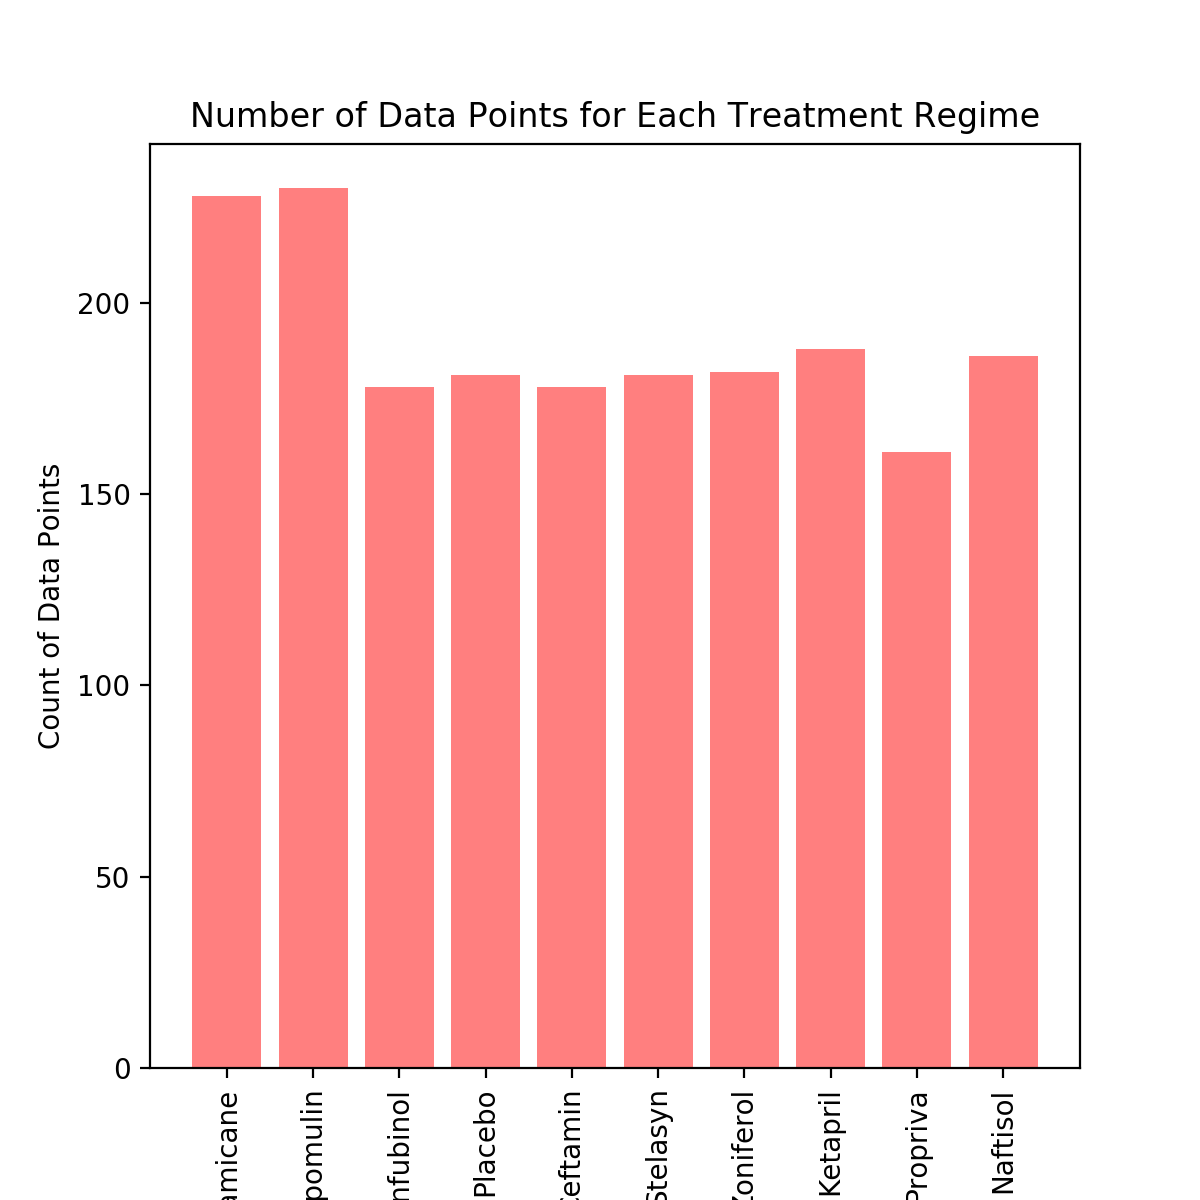

Text(0, 0.5, 'Count of Data Points')

In [16]:
# set x axis and tick locations
x = drug_regimes
tick_locs = [xi for xi in x]
y = summary_stats["count"]

# matplotlib plot
plt.figure(figsize=(6,6))
plt.bar(x, y, color='r', alpha=0.5, align="center")
plt.xticks(tick_locs, x, rotation="vertical")

# Set a title and labels
plt.title("Number of Data Points for Each Treatment Regime")
plt.xlabel("Drug")
plt.ylabel("Count of Data Points")

<IPython.core.display.Javascript object>


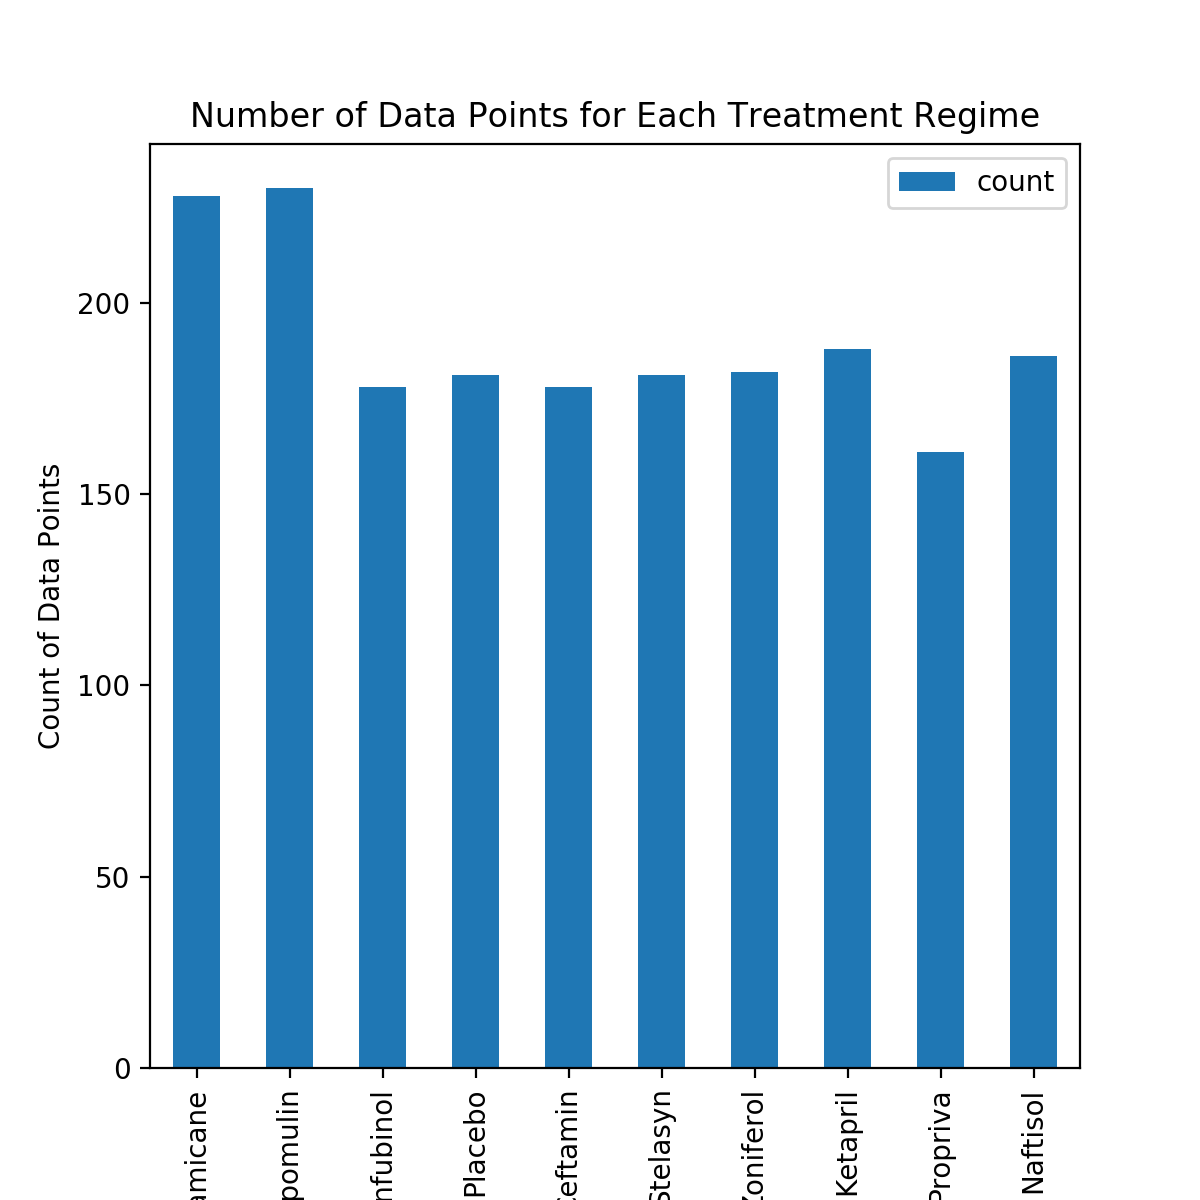

In [17]:
# pandas plot
summary_stats.plot(kind="bar", figsize=(6,6))

# Set a title for the chart
plt.title("Number of Data Points for Each Treatment Regime")
plt.xlabel("Drug")
plt.ylabel("Count of Data Points")

plt.show()

## Pie Chart

In [18]:
# matplotlib pie chart

# Labels for the sections of our pie chart
labels = mouse_study_data["Sex"].unique()

# The values of each section of the pie chart
sizes = mouse_study_data["Sex"].value_counts()

# The colors of each section of the pie chart
colors = ["green", "orange"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0)

<IPython.core.display.Javascript object>


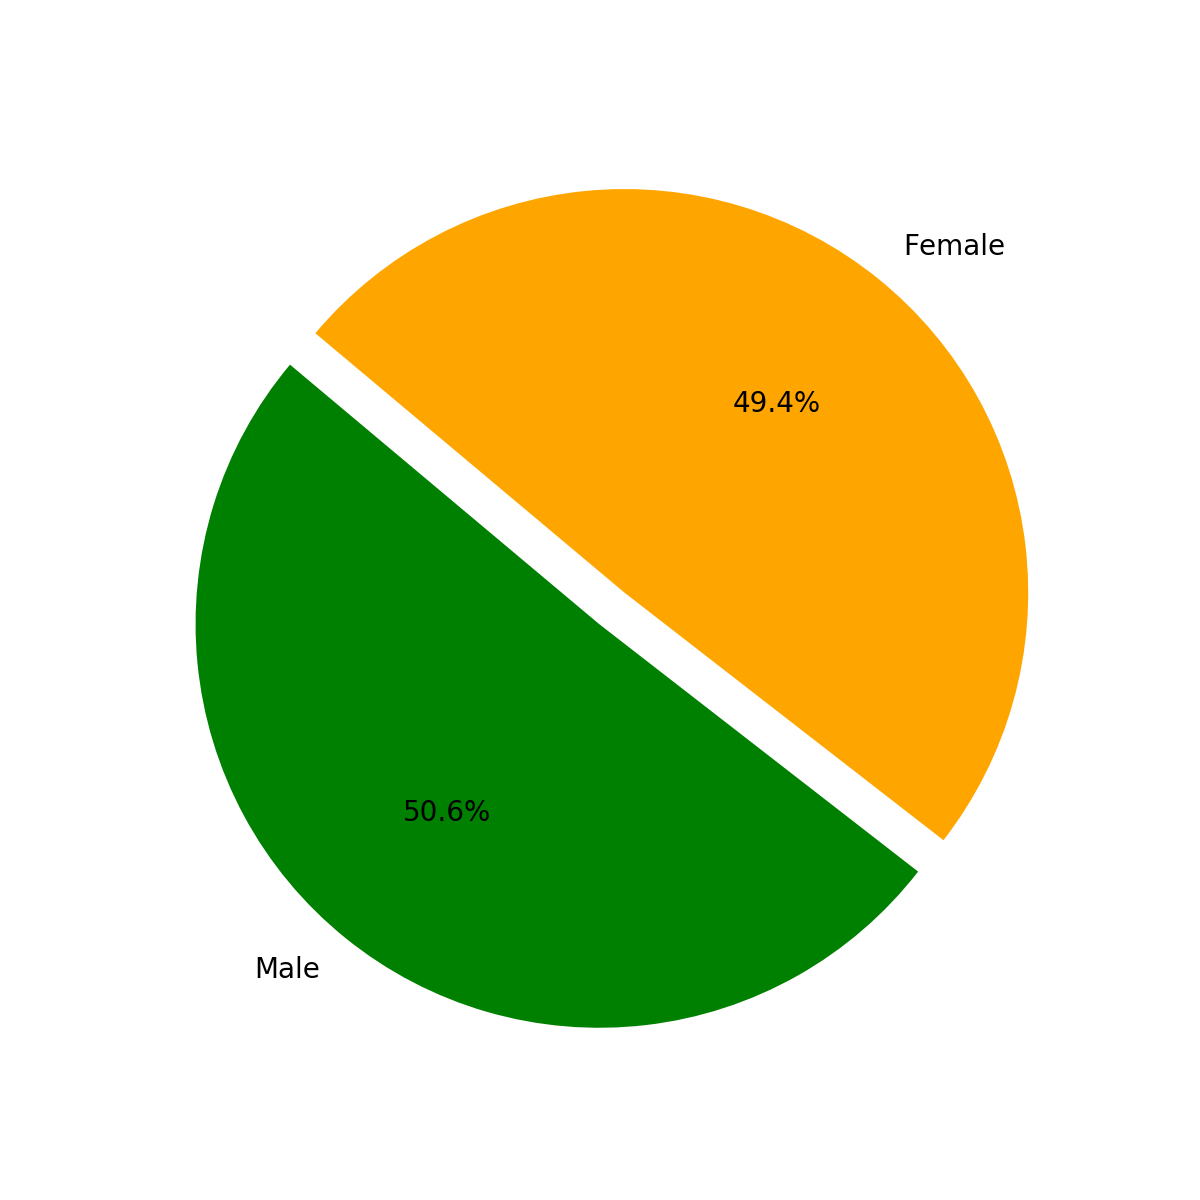

(-1.1756979042636164,
 1.1282937402085897,
 -1.1918349098573184,
 1.1259794268614327)

In [19]:

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)

plt.axis("equal")

In [20]:
# pandas pie chart
try: 
    mouse_study_data.plot.pie(y='Sex',figsize=(5,5))
except TypeError:
    print("why is there a TypeError...check later")

why is there a TypeError...check later


In [21]:
# drug options
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# initialize variables to store data
final_vol = {
                "Mouse ID": [],
                "Drug":[],
                "Tumor Vol_0": [],
                "Tumor Vol_f": [],
                "Change in Tumor Vol":[],
                "dt": []
            }

# loop through drugs to get the last time index
for drug in drugs:
    # get data
    drugi_index = mouse_study_data[mouse_study_data['Drug Regimen'] == drug].index.tolist()
    drugi_data = mouse_study_data.iloc[drugi_index,:]
    
    # get a list of unique mice IDs for this drug
    mice_IDs =  drugi_data["Mouse ID"].unique()
    
    # loop through the mice IDs and extract the interesting data
    for Mouse_ID in mice_IDs:
        mousei_index = drugi_data[drugi_data['Mouse ID'] == Mouse_ID].index.tolist()
        mousei_index = mouse_study_data.iloc[mousei_index,:]
        
        # get initial and final time, calc dt, tf - t0
        maxt = mousei_index['Timepoint'].max()
        mint = mousei_index['Timepoint'].min()
        dt = maxt-mint
        
        # get the row of initial and final time
        max_t_row = mousei_index[mousei_index['Timepoint'] == maxt]
        min_t_row = mousei_index[mousei_index['Timepoint'] == mint]
        
        # get the initial and final tumor volume, calc dvol, volf - vol0
        volf = max_t_row['Tumor Volume (mm3)']
        vol0 = min_t_row['Tumor Volume (mm3)']
        dvol = volf - vol0
        
        # store values
        final_vol["Mouse ID"].append(Mouse_ID)
        final_vol["Drug"].append(drug)
        final_vol["Tumor Vol_0"].append(vol0)
        final_vol["Tumor Vol_f"].append(volf)
        final_vol["Change in Tumor Vol"].append(dvol)
        final_vol["dt"].append(dt)
        
trial_results_df = pd.DataFrame(data=final_vol)
trial_results_df

,Mouse ID,Drug,Tumor Vol_0,Tumor Vol_f,Change in Tumor Vol,dt
0,s185,Capomulin,"10 45.0 Name: Tumor Volume (mm3), dtype: fl...","19 23.343598 Name: Tumor Volume (mm3), dtyp...","10 NaN 19 NaN Name: Tumor Volume (mm3), dt...",45
1,x401,Capomulin,"20 45.0 Name: Tumor Volume (mm3), dtype: fl...","29 28.484033 Name: Tumor Volume (mm3), dtyp...","20 NaN 29 NaN Name: Tumor Volume (mm3), dt...",45
2,m601,Capomulin,"30 45.0 Name: Tumor Volume (mm3), dtype: fl...","39 28.430964 Name: Tumor Volume (mm3), dtyp...","30 NaN 39 NaN Name: Tumor Volume (mm3), dt...",45
3,f966,Capomulin,"60 45.0 Name: Tumor Volume (mm3), dtype: fl...","64 30.485985 Name: Tumor Volume (mm3), dtyp...","60 NaN 64 NaN Name: Tumor Volume (mm3), dt...",20
4,u364,Capomulin,"95 45.0 Name: Tumor Volume (mm3), dtype: fl...","104 31.023923 Name: Tumor Volume (mm3), dty...","95 NaN 104 NaN Name: Tumor Volume (mm3), ...",45
5,y793,Capomulin,"115 45.0 Name: Tumor Volume (mm3), dtype: f...","124 31.896238 Name: Tumor Volume (mm3), dty...","115 NaN 124 NaN Name: Tumor Volume (mm3), ...",45
6,r554,Capomulin,"125 45.0 Name: Tumor Volume (mm3), dtype: f...","134 32.377357 Name: Tumor Volume (mm3), dty...","125 NaN 134 NaN Name: Tumor Volume (mm3), ...",45
7,m957,Capomulin,"135 45.0 Name: Tumor Volume (mm3), dtype: f...","144 33.329098 Name: Tumor Volume (mm3), dty...","135 NaN 144 NaN Name: Tumor Volume (mm3), ...",45
8,t565,Capomulin,"155 45.0 Name: Tumor Volume (mm3), dtype: f...","164 34.455298 Name: Tumor Volume (mm3), dty...","155 NaN 164 NaN Name: Tumor Volume (mm3), ...",45
9,i738,Capomulin,"195 45.0 Name: Tumor Volume (mm3), dtype: f...","204 37.311846 Name: Tumor Volume (mm3), dty...","195 NaN 204 NaN Name: Tumor Volume (mm3), ...",45


In [10]:
unique_time = mouse_study_data['Timepoint'].unique()
unique_time

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [11]:
test = []
test.append(min_t_row['Tumor Volume (mm3)']*2)
test

[1846    90.0
 Name: Tumor Volume (mm3), dtype: float64]

In [12]:
mouse_study_data.set_index("Mouse ID")

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
k403,Ramicane,Male,21,16,25,33.464577,1
k403,Ramicane,Male,21,16,30,31.099498,1
k403,Ramicane,Male,21,16,35,26.546993,1
k403,Ramicane,Male,21,16,40,24.365505,1


In [13]:
row_i

NameError: name 'row_i' is not defined